In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#logistic function 
def sig(z):
    
    sig= 1/(1+np.exp(-z))
    
    return sig

In [3]:
#cost/loss function 
def loss(prob, y):
    
    l=(-y * np.log(prob) - (1 - y) * np.log(1 - prob)).mean()
   
    return l

In [209]:
#training and validation 
def log_reg(x1,y1,x2,y2,epochs,learning_rate):
    l1=[]
    l3=[]
    b=0
    weights = np.random.rand(x1.T.shape[0])
    
    for epoch in range(epochs):
        
        #Basis Function, Probability Caluculation 
        z= np.matmul(x1,weights)+ b
        probability= sig(z)
        l= loss(probability,y1)
        
        
        #validation loss computation
        z1= np.matmul(x2,weights)+ b
        probability1= sig(z1)
        l2= loss(probability1,y2)
        
        #Gradient Descent 
        del_p = probability-y1
        del_w= np.dot(del_p,x1).mean()
        del_b= np.mean(del_p)
        
        l3.append(l2)
        l1.append(l)
        weights= weights - learning_rate*del_w
        b = b - learning_rate*del_b

    #train_data & val_data Epoch vs Loss
    plt.figure(1)  
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(l1)
    plt.plot(l3)
            
    return [b,weights]

In [210]:
#test_data prediction 
def predict(X_test,weights,b):
    
    pred = []
    
    #Prediction Decision Boundry set to 0.5 
    for i in sig(np.dot(X_test, weights.T) + b):
        if i>0.5:
            pred.append(1)
        else:
            pred.append(0)
    
    return pred

In [211]:
#Test data metrics 
def accuracy(y_test,x_test,weights,b):
    
    y_pred= (predict(x_test,weights,b))
    confusion_mat= confusion_matrix(y_test,y_pred)
    
    true_pos=confusion_mat[0][0]
    false_pos=confusion_mat[1][0]
    true_neg= confusion_mat[1][1]
    false_neg= confusion_mat[0][1]
    
    acc = (true_pos + true_neg)/(true_pos+true_neg+false_pos+false_neg)
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    
    print("Accuracy of the Model is:", acc*100)
    print("Precision of the Model is:", precision*100)
    print("Recall of the Model is:", recall*100)
    
    return 0

In [230]:
def main():
    learning_rate= 1
    epochs =15000
    
    #Importing Dataset and Replacing Target values with binary values 
    cancer_data= pd.read_csv('wdbc.csv')
    cancer_data=cancer_data.replace('M',1)
    cancer_data=cancer_data.replace('B',0)
    cancer_data.head(10)
    
    # Feature Extraction and Normalization 
    xi = cancer_data.iloc[:, 2:32].values
    x= ((xi-np.min(xi))/(np.max(xi)-np.min(xi)))
    
    #Splitting Data Set into Train, Test and Validation Data 
    y = cancer_data.iloc[:, 1].values
    x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size = 0.1, random_state =17)
    x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size = 0.1, random_state = 17) 
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,x_val.shape,y_val.shape)
    
    #Function Call for Logistic Regression 
    set= log_reg(x_train,y_train,x_val,y_val,epochs,learning_rate)
    b=set[0]
    weights=np.array(set[1:])
    
    print(weights)
    accuracy(y_test,x_test,weights,b)
  

(460, 30) (57, 30) (460,) (57,) (52, 30) (52,)
[[23.41395888 22.82188344 22.65877431 23.16834875 22.62229495 23.42866187
  22.86402825 22.89506745 22.75621177 22.98419451 23.4690107  23.21725827
  23.33463992 22.69461093 22.90313422 22.63863335 22.99286839 22.76803929
  22.8874148  23.4030357  23.29787381 22.79646192 22.51014637 23.04730584
  22.64869149 23.38125298 22.53990115 23.47279903 23.22488508 22.61138221]]
Accuracy of the Model is: 98.24561403508771
Precision of the Model is: 97.82608695652173
Recall of the Model is: 100.0


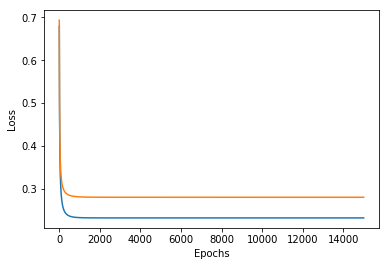

In [231]:
if __name__ == "__main__":
    main()